In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt

PQ: BasePriorityQueue(nqueues:20, lag: 10000, add:1, pop:2); Average: 14.833883388338833; Median: 9


(array([1.14980442e-01, 7.76475163e-02, 2.94439382e-02, 4.69612179e-02,
        4.00040004e-02, 1.50946772e-02, 2.74561618e-02, 1.23614846e-02,
        2.25488387e-02, 2.24867207e-02, 1.08085343e-02, 2.15549505e-02,
        1.09327703e-02, 1.93808201e-02, 1.52189132e-02, 7.08145349e-03,
        1.38523169e-02, 5.90121124e-03, 1.02494722e-02, 1.16781865e-02,
        3.85131681e-03, 9.25558394e-03, 8.82075785e-03, 3.85131681e-03,
        7.88898766e-03, 3.04378264e-03, 6.21180130e-03, 5.03155906e-03,
        2.60895655e-03, 4.09978886e-03, 2.36048450e-03, 3.47860873e-03,
        3.29225469e-03, 1.86354039e-03, 2.67107456e-03, 1.11812423e-03,
        2.29836648e-03, 1.86354039e-03, 1.05600622e-03, 9.31770196e-04,
        9.93888209e-04, 4.96944104e-04, 9.93888209e-04, 4.34826091e-04,
        6.83298143e-04, 8.07534170e-04, 4.96944104e-04, 3.72708078e-04,
        3.72708078e-04, 5.59062117e-04, 2.48472052e-04, 6.21180130e-05,
        2.48472052e-04, 4.34826091e-04, 3.72708078e-04, 4.348260

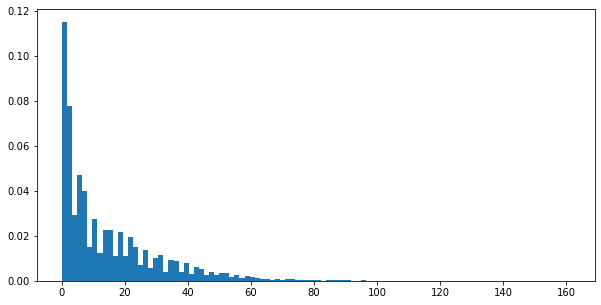

In [2]:
import statistics
import random
from testrunner import TestRunner
from distributed_pq import BasePriorityQueue
random.seed(5)

consumer_lag = 10000
num_iterations = 10000

pq1 = BasePriorityQueue(num_queues=20, num_queues_lb_add=1, num_queues_lb_pop=2)

out1 = TestRunner(queue=pq1, consumer_lag=consumer_lag, num_iterations=num_iterations).run()

plt.rcParams['figure.figsize'] = [10, 5]
plt.hist(out1, 100, density=True)

PQ: BasePriorityQueue(nqueues:20, lag: 9999, add:1, pop:2); Average: 23.4502; Median: 15.0


(array([7.39269406e-02, 3.21917808e-02, 2.93150685e-02, 2.56621005e-02,
        2.35159817e-02, 3.17808219e-02, 1.89954338e-02, 1.75342466e-02,
        1.51141553e-02, 1.39269406e-02, 2.14155251e-02, 1.17808219e-02,
        9.17808219e-03, 9.68036530e-03, 8.67579909e-03, 1.07305936e-02,
        6.84931507e-03, 6.52968037e-03, 6.75799087e-03, 5.52511416e-03,
        6.66666667e-03, 6.89497717e-03, 5.47945205e-03, 3.33333333e-03,
        3.56164384e-03, 4.52054795e-03, 5.02283105e-03, 2.69406393e-03,
        2.51141553e-03, 3.05936073e-03, 2.51141553e-03, 3.56164384e-03,
        2.37442922e-03, 1.46118721e-03, 1.64383562e-03, 1.00456621e-03,
        2.10045662e-03, 9.58904110e-04, 1.59817352e-03, 1.32420091e-03,
        1.36986301e-03, 9.58904110e-04, 1.27853881e-03, 4.10958904e-04,
        5.93607306e-04, 3.19634703e-04, 7.76255708e-04, 9.58904110e-04,
        6.84931507e-04, 4.10958904e-04, 5.47945205e-04, 4.10958904e-04,
        6.84931507e-04, 3.19634703e-04, 1.82648402e-04, 3.196347

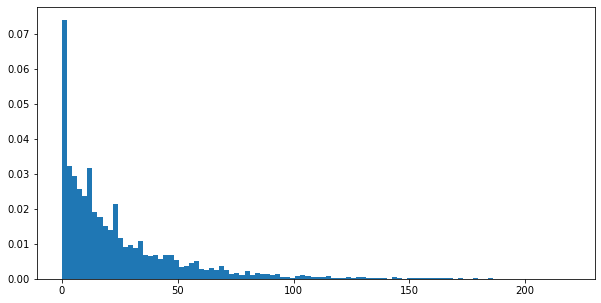

In [3]:
# with concurrent pop
import statistics
import random
from testrunner import TestRunner
from testrunner_v2 import TestRunnerV2
from distributed_pq import BasePriorityQueue
random.seed(5)

consumer_lag = 10000
num_iterations = 10000
num_concurrent_pops = 50

pq1 = BasePriorityQueue(num_queues=20, num_queues_lb_add=1, num_queues_lb_pop=2)

out1 = TestRunnerV2(queue=pq1, consumer_lag=consumer_lag, num_iterations=num_iterations, num_concurrent_pops = num_concurrent_pops).run()

plt.rcParams['figure.figsize'] = [10, 5]
plt.hist(out1, 100, density=True)

In [4]:
import statistics
import random
from testrunner import TestRunner
from distributed_pq import BasePriorityQueue
random.seed(5)

x_list = []

average1_list = []
median1_list = []

average2_list = []
median2_list = []

average3_list = []
median3_list = []

for x in [x for x in range(1, 100000, 10000)]:
    print(x)
    num_queues = 20
    consumer_lag = x # 10000
    num_iterations = 10000
    
    pq1 = BasePriorityQueue(num_queues=num_queues, num_queues_lb_add=1, num_queues_lb_pop=1)
    out1 = TestRunner(queue=pq1, consumer_lag=consumer_lag, num_iterations=num_iterations).run()
    
    pq2 = BasePriorityQueue(num_queues=num_queues, num_queues_lb_add=2, num_queues_lb_pop=1)
    out2 = TestRunner(queue=pq2, consumer_lag=consumer_lag, num_iterations=num_iterations).run()
    
    pq3 = BasePriorityQueue(num_queues=num_queues, num_queues_lb_add=1, num_queues_lb_pop=2)
    out3 = TestRunner(queue=pq3, consumer_lag=consumer_lag, num_iterations=num_iterations).run()
    
    x_list.append(x)
    average1_list.append(statistics.mean(out1))
    median1_list.append(statistics.median(out1))
    average2_list.append(statistics.mean(out2))
    median2_list.append(statistics.median(out2))
    average3_list.append(statistics.mean(out3))
    median3_list.append(statistics.median(out3))
    

1
PQ: BasePriorityQueue(nqueues:20, lag: 1, add:1, pop:1); Average: 0.47014701470147013; Median: 0
PQ: BasePriorityQueue(nqueues:20, lag: 1, add:2, pop:1); Average: 0.4957495749574958; Median: 0
PQ: BasePriorityQueue(nqueues:20, lag: 1, add:1, pop:2); Average: 0.3092309230923092; Median: 0
10001
PQ: BasePriorityQueue(nqueues:20, lag: 10001, add:1, pop:1); Average: 150.2966296629663; Median: 58
PQ: BasePriorityQueue(nqueues:20, lag: 10001, add:2, pop:1); Average: 81.87048704870487; Median: 33
PQ: BasePriorityQueue(nqueues:20, lag: 10001, add:1, pop:2); Average: 15.245424542454245; Median: 9
20001
PQ: BasePriorityQueue(nqueues:20, lag: 20001, add:1, pop:1); Average: 238.77547754775478; Median: 112
PQ: BasePriorityQueue(nqueues:20, lag: 20001, add:2, pop:1); Average: 106.74587458745874; Median: 65
PQ: BasePriorityQueue(nqueues:20, lag: 20001, add:1, pop:2); Average: 15.389738973897389; Median: 10
30001
PQ: BasePriorityQueue(nqueues:20, lag: 30001, add:1, pop:1); Average: 178.2879287928792

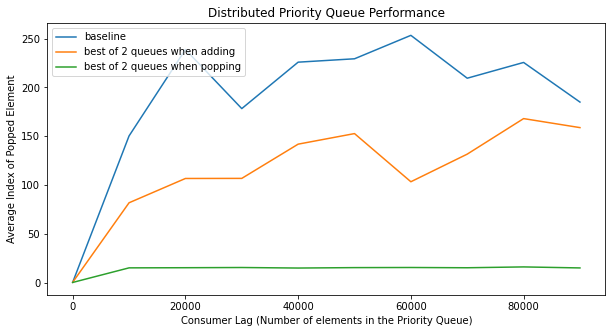

In [5]:
plt.plot(x_list, average1_list, label="baseline")
plt.plot(x_list, average2_list, label="best of 2 queues when adding")
plt.plot(x_list, average3_list, label="best of 2 queues when popping")
plt.legend()
plt.title("Distributed Priority Queue Performance")
plt.xlabel("Consumer Lag (Number of elements in the Priority Queue)")
plt.ylabel("Average Index of Popped Element")
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

In [6]:
import statistics
import random
from testrunner import TestRunner
from distributed_pq import BasePriorityQueue
random.seed(5)

x_list = []

average1_list = []
median1_list = []

average2_list = []
median2_list = []

for x in range(1, 100, 5):
    print(x)
    num_queues = 100
    consumer_lag = 10000
    num_iterations = 10000
    
    pq1 = BasePriorityQueue(num_queues=num_queues, num_queues_lb_add=x, num_queues_lb_pop=1)
    out1 = TestRunner(queue=pq1, consumer_lag=consumer_lag, num_iterations=num_iterations).run()
    
    pq2 = BasePriorityQueue(num_queues=num_queues, num_queues_lb_add=1, num_queues_lb_pop=x)
    out2 = TestRunner(queue=pq2, consumer_lag=consumer_lag, num_iterations=num_iterations).run()
    
    x_list.append(x)
    average1_list.append(statistics.mean(out1))
    median1_list.append(statistics.median(out1))
    average2_list.append(statistics.mean(out2))
    median2_list.append(statistics.median(out2))
    

1
PQ: BasePriorityQueue(nqueues:100, lag: 10000, add:1, pop:1); Average: 444.66246624662466; Median: 232
PQ: BasePriorityQueue(nqueues:100, lag: 10000, add:1, pop:1); Average: 415.1991199119912; Median: 206
6
PQ: BasePriorityQueue(nqueues:100, lag: 10000, add:6, pop:1); Average: 210.66976697669767; Median: 130
PQ: BasePriorityQueue(nqueues:100, lag: 10000, add:1, pop:6); Average: 18.576357635763575; Median: 13
11
PQ: BasePriorityQueue(nqueues:100, lag: 10000, add:11, pop:1); Average: 214.00790079007902; Median: 127
PQ: BasePriorityQueue(nqueues:100, lag: 10000, add:1, pop:11); Average: 9.218321832183218; Median: 6
16
PQ: BasePriorityQueue(nqueues:100, lag: 10000, add:16, pop:1); Average: 217.62306230623062; Median: 138
PQ: BasePriorityQueue(nqueues:100, lag: 10000, add:1, pop:16); Average: 6.043504350435043; Median: 4
21
PQ: BasePriorityQueue(nqueues:100, lag: 10000, add:21, pop:1); Average: 218.46614661466145; Median: 137
PQ: BasePriorityQueue(nqueues:100, lag: 10000, add:1, pop:21); 

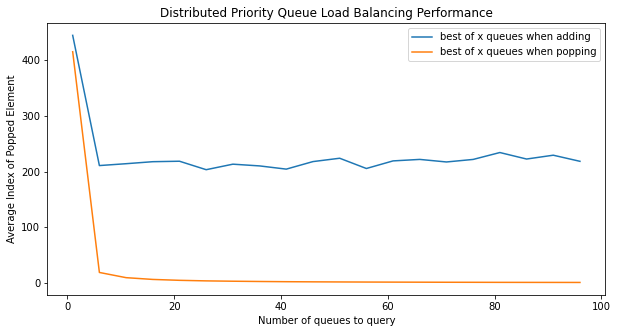

In [7]:
plt.plot(x_list, average1_list, label="best of x queues when adding")
plt.plot(x_list, average2_list, label="best of x queues when popping")
plt.legend()
plt.title("Distributed Priority Queue Load Balancing Performance")
plt.xlabel("Number of queues to query")
plt.ylabel("Average Index of Popped Element")
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()